In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


IMPORTING DATASET

In [ ]:
assessements_python = pd.read_csv('assessements_cleaned.csv')

In [ ]:
assessements_python.corr()

,isRetaken,c.averageScore,first score,skill understanding duration,duration of assessement,number of switches
isRetaken,1.000000,-0.130018,-0.280156,0.028185,-0.006546,-0.000682
c.averageScore,-0.130018,1.000000,0.771521,-0.000295,-0.001706,-0.037924
first score,-0.280156,0.771521,1.000000,-0.000459,0.000231,-0.066037
skill understanding duration,0.028185,-0.000295,-0.000459,1.000000,-0.001007,0.013759
duration of assessement,-0.006546,-0.001706,0.000231,-0.001007,1.000000,0.002164
number of switches,-0.000682,-0.037924,-0.066037,0.013759,0.002164,1.000000


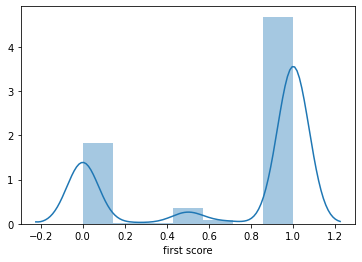

In [ ]:
sns.distplot(assessements_python['first score'],bins=7,kde=True, hist=True)

In [ ]:
assessements_python.describe()

,c.averageScore,first score,skill understanding duration,duration of assessement,number of switches
count,9493.000000,9493.000000,9493.000000,9492.000000,9493.000000
mean,0.799631,0.704378,492.342252,107.158344,1.127462
std,0.386059,0.438072,7059.061482,2338.567122,0.615485
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,7.000000,1.000000
50%,1.000000,1.000000,44.000000,13.000000,1.000000
75%,1.000000,1.000000,145.000000,31.000000,1.000000
max,1.000000,1.000000,361669.000000,160666.000000,10.000000


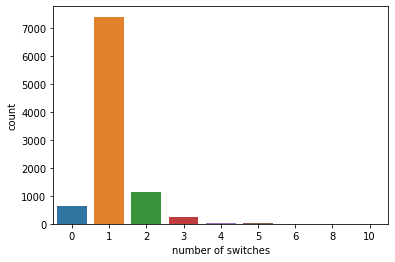

In [ ]:
sns.countplot(data=assessements_python,x='number of switches')

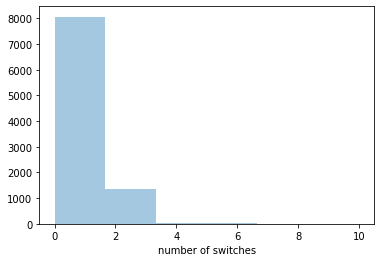

In [ ]:
sns.distplot(assessements_python['number of switches'],bins=6,kde=False, hist=True)

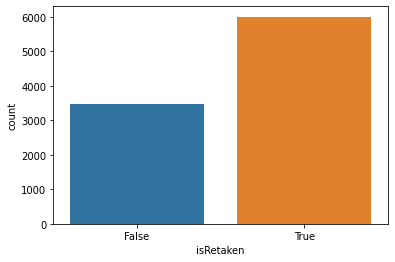

In [ ]:
sns.countplot(data=assessements_python, x='isRetaken')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text major ticklabel objects>)

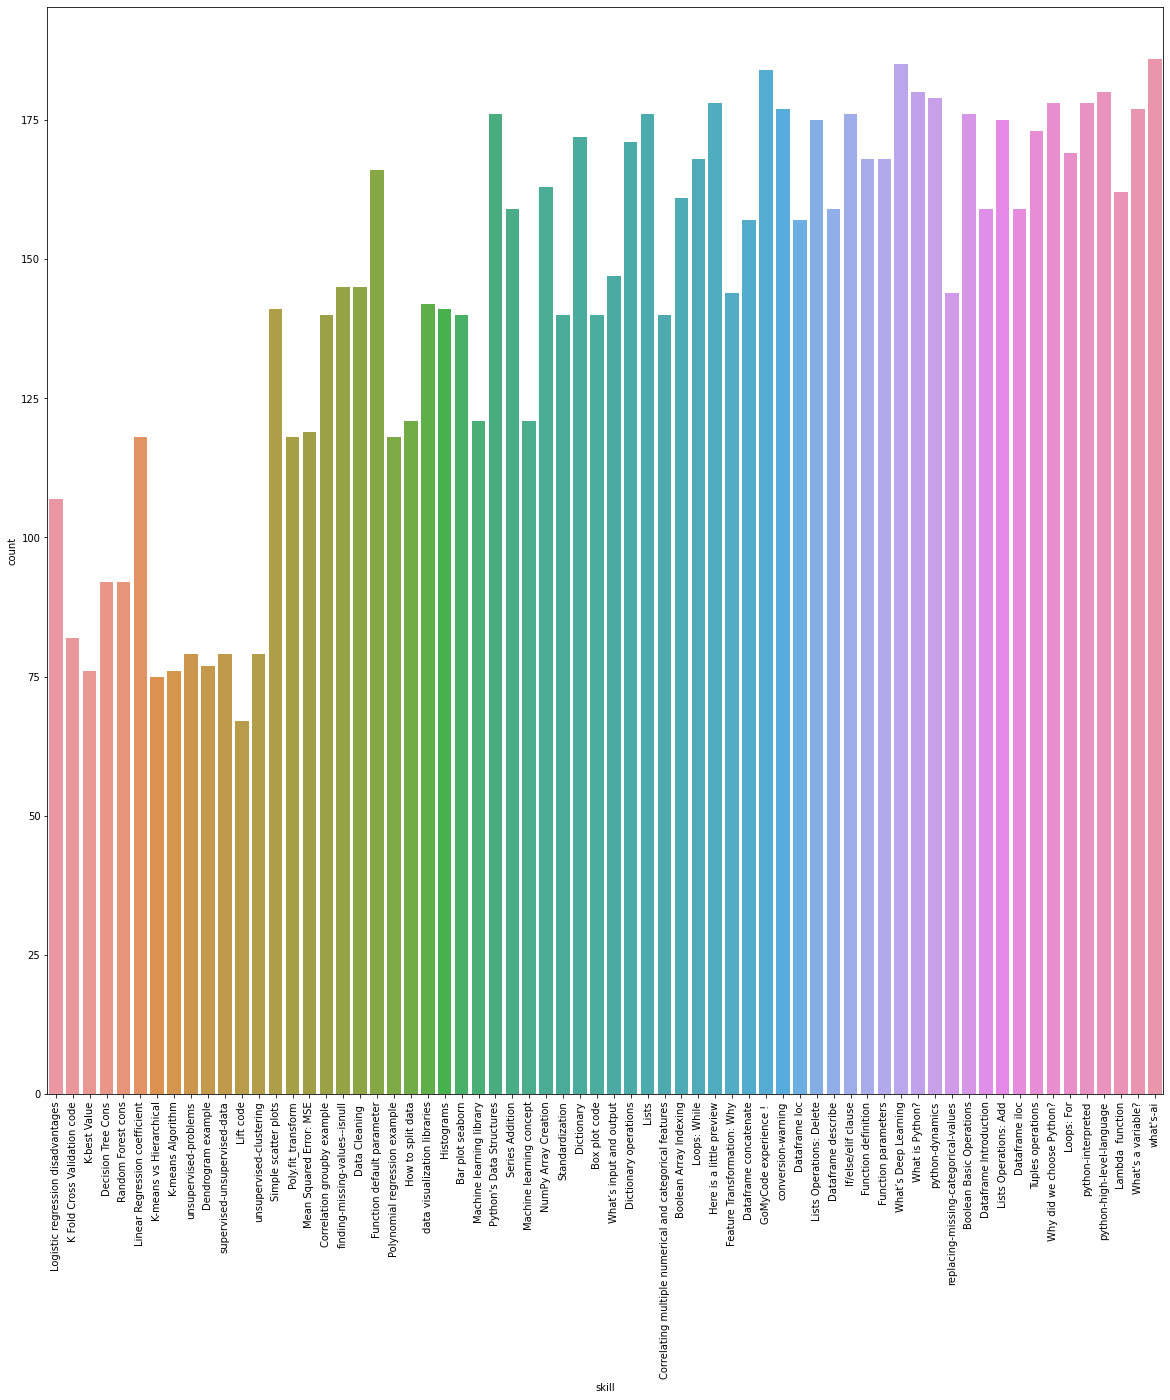

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(assessements_python['skill'])
plt.xticks(rotation='90')

In [ ]:
assessements_python=assessements_python[assessements_python['duration of assessement']<900]
assessements_python=assessements_python[assessements_python['skill understanding duration']<1200]

In [ ]:
assessements_python.describe()

,c.averageScore,first score,skill understanding duration,duration of assessement,number of switches
count,9136.000000,9136.000000,9136.000000,9136.000000,9136.000000
mean,0.799243,0.703930,112.933122,34.279116,1.124781
std,0.386656,0.438618,180.078002,73.994097,0.617191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10.000000,7.000000,1.000000
50%,1.000000,1.000000,41.000000,13.000000,1.000000
75%,1.000000,1.000000,129.000000,30.000000,1.000000
max,1.000000,1.000000,1196.000000,871.000000,10.000000


In [ ]:
assessements_python.loc[ assessements_python['duration of assessement'] <= 7, 'duration of assessement'] = 0
assessements_python.loc[(assessements_python['duration of assessement'] > 7) & (assessements_python['duration of assessement'] <= 15), 'duration of assessement'] = 1
assessements_python.loc[(assessements_python['duration of assessement'] > 15) & (assessements_python['duration of assessement'] <= 34), 'duration of assessement'] = 2
assessements_python.loc[ assessements_python['duration of assessement'] > 34, 'duration of assessement'] =3
assessements_python.loc[ assessements_python['skill understanding duration'] <= 9, 'skill understanding duration'] = 0
assessements_python.loc[(assessements_python['skill understanding duration'] > 9) & (assessements_python['skill understanding duration'] <= 41), 'skill understanding duration'] = 1
assessements_python.loc[(assessements_python['skill understanding duration'] > 41) & (assessements_python['skill understanding duration'] <= 130), 'skill understanding duration'] = 2
assessements_python.loc[ assessements_python['skill understanding duration'] > 130, 'skill understanding duration'] =3


In [ ]:
assessements_python['skill']

0       Logistic regression disadvantages
1       Logistic regression disadvantages
2       Logistic regression disadvantages
3       Logistic regression disadvantages
4       Logistic regression disadvantages
                      ...                
9487                            what's-ai
9488                            what's-ai
9490                            what's-ai
9491                            what's-ai
9492                            what's-ai
Name: skill, Length: 9136, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


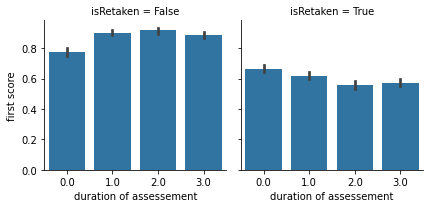

In [ ]:
grid = sns.FacetGrid(data=assessements_python, col='isRetaken')
grid.map(sns.barplot, 'duration of assessement', 'first score')
grid.add_legend()

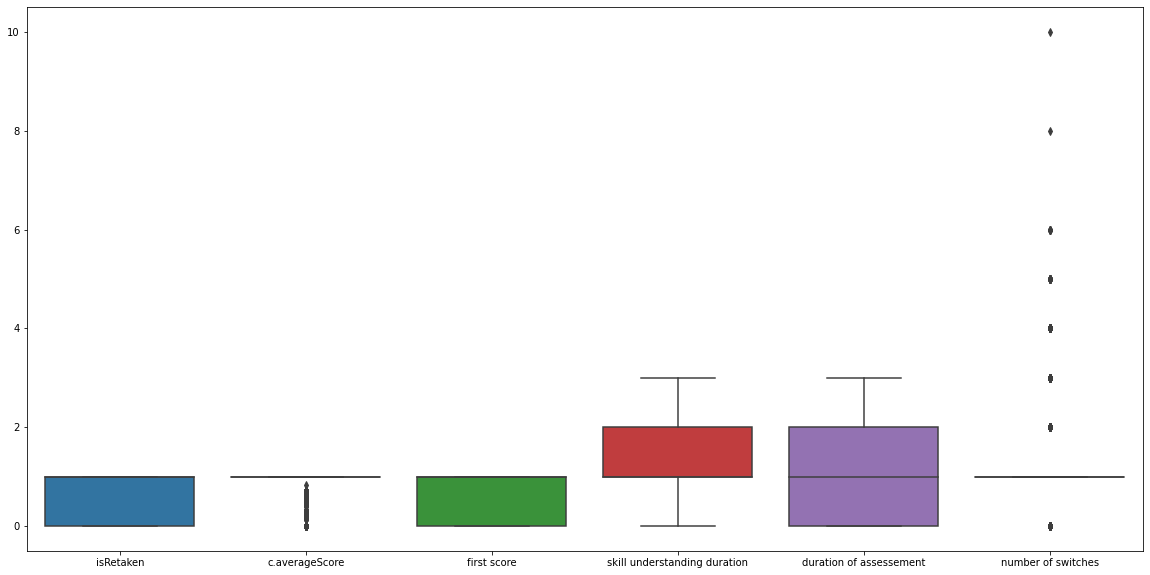

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=assessements_python.drop(columns={'student id','skill'}),ax=ax)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


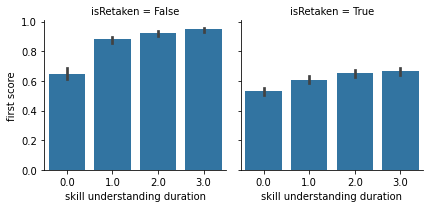

In [ ]:
grid = sns.FacetGrid(data=assessements_python, col='isRetaken')
grid.map(sns.barplot, 'skill understanding duration', 'first score')
grid.add_legend()

In [ ]:
assessements_python.groupby(assessements_python['isRetaken'], as_index=True).mean()

,c.averageScore,first score,skill understanding duration,duration of assessement,number of switches
isRetaken,,,,,
False,0.864498,0.864498,1.626370,1.334519,1.130074
True,0.761014,0.609863,1.423538,1.363826,1.121680


In [ ]:
# g = sns.PairGrid(assessements_python, diag_sharey=False)
# g.map_upper(sns.barplot)
# g.map_lower(sns.kdeplot, colors="C0")
# g.map_diag(sns.kdeplot, lw=2)

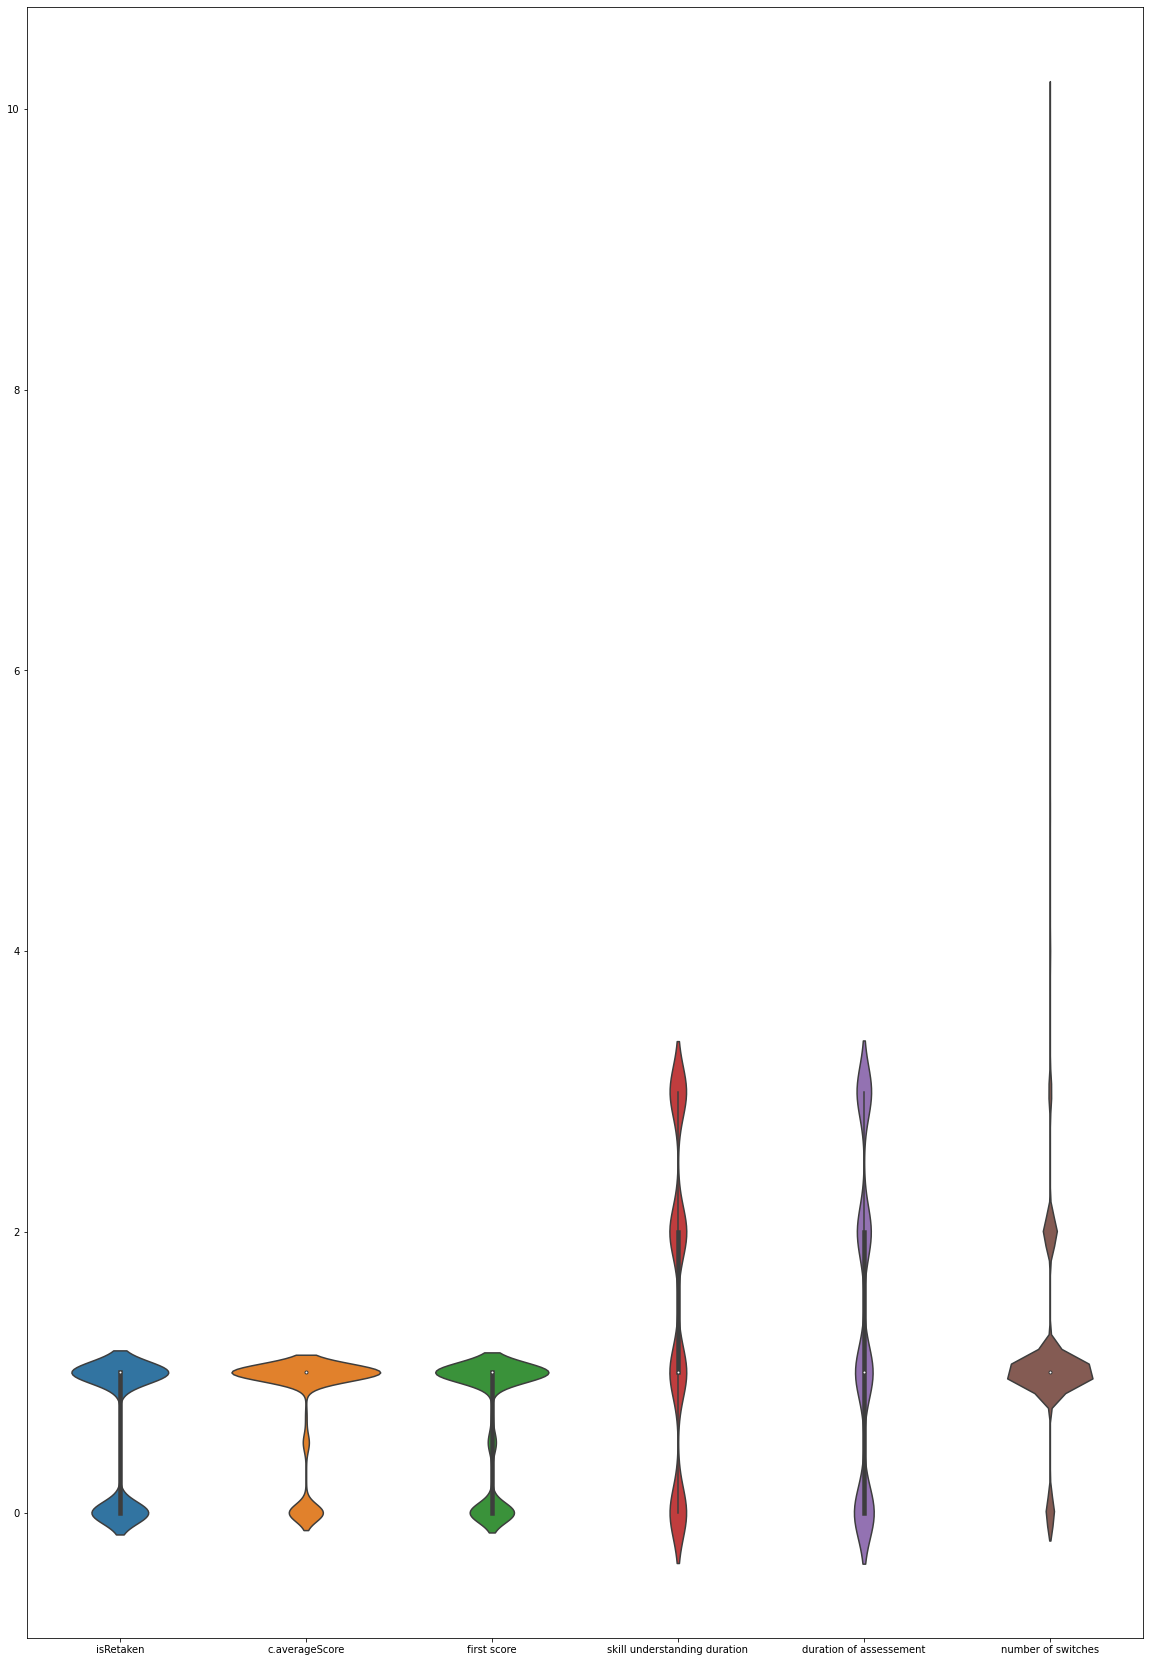

In [ ]:
fig, ax = plt.subplots(figsize=[20,30])
sns.violinplot( data=assessements_python, ax=ax)

In [ ]:
assessements_python

,student id,skill,isRetaken,c.averageScore,first score,skill understanding duration,duration of assessement,number of switches
0,b31f79d9-d4ce-4c4e-add0-3ac68bf76d57,Logistic regression disadvantages,True,1.0,0.0,0.0,3.0,2
1,500b188f-d660-470c-890a-0f9544b2ef2f,Logistic regression disadvantages,False,1.0,1.0,2.0,0.0,1
2,770f89f6-a5bc-471a-99a0-11ab305c91c8,Logistic regression disadvantages,True,1.0,1.0,2.0,1.0,1
3,bd478cd8-eb8c-4e22-b2f6-f500304f8e8d,Logistic regression disadvantages,False,1.0,1.0,0.0,0.0,1
4,e11eac48-dcb7-4879-9605-6f598b7f05a3,Logistic regression disadvantages,False,1.0,1.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...
9487,3a21c413-2c1f-421c-a636-d534d88f4f79,what's-ai,True,0.0,0.0,0.0,2.0,2
9488,aea3cb4c-df2c-4953-ab70-eb0aeed49d21,what's-ai,True,1.0,1.0,0.0,1.0,1
9490,f714f1ca-2e7f-450b-abd2-1eb6c60cd79e,what's-ai,True,1.0,1.0,2.0,1.0,1
9491,6b03928f-30a7-44ca-be4f-2251bf30312a,what's-ai,True,0.0,0.0,0.0,0.0,1


In [ ]:
assessement_divided=assessements_python.groupby('skill', as_index=True)

In [ ]:
for i in assessements_python['skill'].value_counts().keys():
  print(assessement_divided.get_group(i)['number of switches'].mean(),'\t',i)

0.4972677595628415 	 What’s Deep Learning
0.48314606741573035 	 python-high-level-language
1.1694915254237288 	 what's-ai
1.0338983050847457 	 conversion-warning
0.6761363636363636 	 python-dynamics
1.1306818181818181 	 Boolean Basic Operations
1.125 	 Here is a little preview
0.5085714285714286 	 Why did we choose Python?
1.4285714285714286 	 GoMyCode experience ! 
0.4913294797687861 	 python-interpreted
0.6127167630057804 	 What is Python?
1.244186046511628 	 Lists Operations: Add
1.3604651162790697 	 Lists
1.0584795321637428 	 If/else/elif clause
1.0588235294117647 	 Lists Operations: Delete
1.088235294117647 	 Tuples operations
2.0297619047619047 	 Python's Data Structures
1.1964285714285714 	 What's a variable?
1.2289156626506024 	 Dictionary operations
1.170731707317073 	 Function definition
1.0920245398773005 	 Function default parameter
1.3251533742331287 	 Dictionary
1.2173913043478262 	 Function parameters
1.3043478260869565 	 Loops: While
1.5345911949685536 	 Loops: For
1.28

In [ ]:
for i in assessements_python['skill'].value_counts().keys():
  print(assessement_divided.get_group(i)['isRetaken'].mean(),'\t',i)

0.5409836065573771 	 What’s Deep Learning
0.5955056179775281 	 python-high-level-language
0.7401129943502824 	 what's-ai
0.6836158192090396 	 conversion-warning
0.6988636363636364 	 python-dynamics
0.7159090909090909 	 Boolean Basic Operations
0.5625 	 Here is a little preview
0.6114285714285714 	 Why did we choose Python?
0.5942857142857143 	 GoMyCode experience ! 
0.6184971098265896 	 python-interpreted
0.6069364161849711 	 What is Python?
0.5697674418604651 	 Lists Operations: Add
0.7616279069767442 	 Lists
0.6023391812865497 	 If/else/elif clause
0.5764705882352941 	 Lists Operations: Delete
0.6529411764705882 	 Tuples operations
0.6845238095238095 	 Python's Data Structures
0.6547619047619048 	 What's a variable?
0.7048192771084337 	 Dictionary operations
0.6158536585365854 	 Function definition
0.6134969325153374 	 Function default parameter
0.8282208588957055 	 Dictionary
0.6273291925465838 	 Function parameters
0.6024844720496895 	 Loops: While
0.6477987421383647 	 Loops: For
0

In [ ]:
assessements_python.groupby(assessements_python['skill']).mean().sort_values(by=['number of switches','isRetaken'], ascending=False).head().index

Index(['Python's Data Structures', 'Loops: For', 'Dataframe iloc',
       'Linear Regression coefficient', 'GoMyCode experience ! '],
      dtype='object', name='skill')

In [ ]:
assessements_python.groupby(assessements_python['skill']).mean().sort_values(by=['skill understanding duration','duration of assessement'], ascending=False).head().index

Index(['Dataframe Introduction', 'Mean Squared Error: MSE',
       'Simple scatter plots', 'unsupervised-problems', 'Lambda  function'],
      dtype='object', name='skill')

In [ ]:
assessements_python.groupby(assessements_python['skill']).mean().sort_values(by=['first score']).head().index

Index(['Data Cleaning ', 'Box plot code',
       'Correlating multiple numerical and categorical features',
       'Decision Tree Cons', 'Mean Squared Error: MSE'],
      dtype='object', name='skill')

they have problems especially in those skills:
lambda functions,dataframe loc/iloc,python data structures,
numpyarray ,series Addition
technical issues:lambda,boolean Array Indexing
comprehensive issues:series addition,loc/iloc,python data structures